<a href="https://colab.research.google.com/github/Sandraodion/AIR-QUALITY-IN-ABUJA/blob/main/Odion_Dissertation_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing of Libraries

In [ ]:
#Data handling and processing
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#Data Encoding and Proprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# XGBoost
import xgboost as xgb

# Deep Learning (ANN, CNN, RNN)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM, GRU

# Model Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, silhouette_score
from sklearn.utils.validation import check_is_fitted

# Model Training Utilities
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Dimensionality Reduction
from sklearn.decomposition import PCA

#setting up matplolib for inline plotting(if using jupyter notebook)
%matplotlib inline

#suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Task 1. Load and explore the data (note your observations).

In [ ]:
# Reading the dataset
df = pd.read_csv("churn.csv")

In [ ]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
# Set the 'row number' column as the index of the DataFrame
df.set_index('RowNumber', inplace=True)

In [ ]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
1                101348.88       1  
2                112542.58       0  
3                113931.57       1  
4                 93826.63       0  
5                 79084.10       0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
#summary descriptive analysis of the dataset(numerical values)
df.describe()

CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Exited  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [ ]:
#summary descriptive analysis of the dataset(categorical variables)
df.describe(include='object')

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

### Checking for Unique Values for each columns

In [ ]:
df.select_dtypes(include='object')

Surname Geography  Gender
RowNumber                             
1           Hargrave    France  Female
2               Hill     Spain  Female
3               Onio    France  Female
4               Boni    France  Female
5           Mitchell     Spain  Female
...              ...       ...     ...
9996        Obijiaku    France    Male
9997       Johnstone    France    Male
9998             Liu    France  Female
9999       Sabbatini   Germany    Male
10000         Walker    France  Female

[10000 rows x 3 columns]

In [ ]:
def unique_values(df):
    for i in df.select_dtypes(include='object'):
        if len(df[i].unique()):
            print(f"Unique values of '{i}':\n")
            print(df[i].unique())
            print("\n---------------------\n")


unique_values(df)

Unique values of 'Surname':

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

---------------------

Unique values of 'Geography':

['France' 'Spain' 'Germany']

---------------------

Unique values of 'Gender':

['Female' 'Male']

---------------------



### Checking for Missing Values

In [ ]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Checking for Duplicated Rows in a DataFrame

In [ ]:
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [ ]:
def duplicate_value(df):
    print("Duplicate check....")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
          print("There are", num_duplicates, "duplicated observations in the dataset.")
          df.drop_duplicates(keep='first', inplace=True)
          print(num_duplicates, "duplicates were dropped!")
          print("No more duplicate rows!")
    else:
          print("There are no duplicates in the dataset.")

duplicate_value(df)

Duplicate check....
There are no duplicates in the dataset.


#  Exploratory Data Analysis
##  Univariate Analysis
### Variable- Balance Distribution

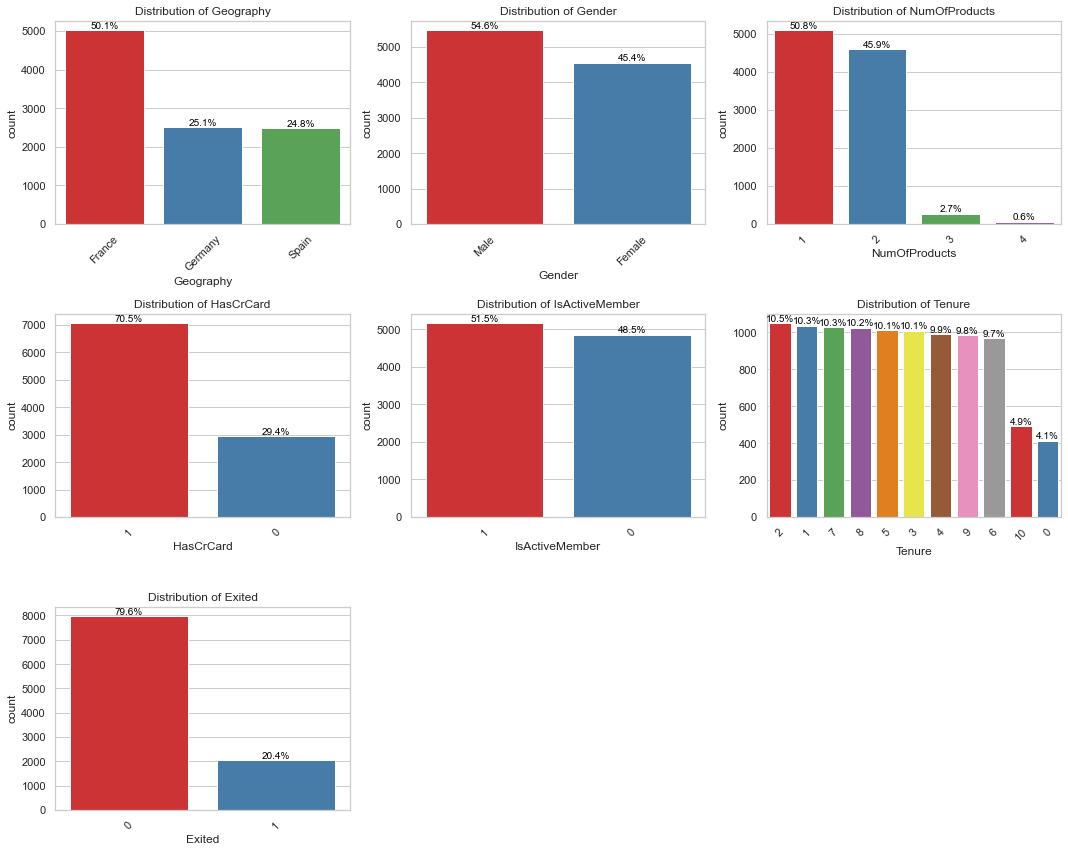

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def bivariate_analysis(df, analysis_columns, columns_per_row=3):
    """
    Perform bivariate analysis by creating countplots in a grid layout
    with percentage annotations on top of each bar.

    Parameters:
        df (DataFrame): The input DataFrame.
        analysis_columns (list): List of columns to analyze.
        columns_per_row (int): Number of plots per row.
    """
    sns.set(style="whitegrid")  # Set clean grid style
    total_plots = len(analysis_columns)  # Total number of columns to plot
    rows = (total_plots + columns_per_row - 1) // columns_per_row  # Calculate rows

    # Set up the figure for subplots
    fig, axes = plt.subplots(rows, columns_per_row, figsize=(15, rows * 4))
    axes = axes.flatten()  # Flatten the axes array to loop easily

    for i, column in enumerate(analysis_columns):
        # Create the countplot
        ax = sns.countplot(
            x=column,
            data=df,
            palette="Set1",
            order=df[column].value_counts().index,
            ax=axes[i]
        )
        axes[i].set_title(f"Distribution of {column}", fontsize=12)  # Add title
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks

        # Calculate total count for percentages
        total = len(df[column])

        # Add percentage labels on top of the bars
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'  # Format percentage to 1 decimal
            ax.annotate(percentage,
                        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of text
                        ha='center', va='bottom', fontsize=10, color='black')  # Center alignment and styling

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Example usage
analysis_columns = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Tenure", "Exited"]
bivariate_analysis(df, analysis_columns, columns_per_row=3)


In [ ]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

def bivariate_analysis(df, analysis_columns, columns_per_row=3):
    """
    Perform bivariate analysis by creating bar charts using Plotly Express,
    arranged in a grid layout with counts displayed on the Y-axis and
    percentages displayed on top of each bar.

    Parameters:
        df (DataFrame): The input DataFrame.
        analysis_columns (list): List of columns to analyze.
        columns_per_row (int): Number of plots per row.
    """
    total_plots = len(analysis_columns)  # Total number of charts
    rows = math.ceil(total_plots / columns_per_row)  # Calculate total rows needed

    # Create a subplot grid
    fig = make_subplots(
        rows=rows,
        cols=columns_per_row,
        subplot_titles=[f"Distribution of {col}" for col in analysis_columns],
        vertical_spacing=0.10  # Adjust vertical space between rows
    )

    # Loop through each column to create individual bar charts
    for index, column in enumerate(analysis_columns):
        # Calculate counts and percentages for the column
        counts = df[column].value_counts()
        total_count = counts.sum()  # Total number of rows for percentage calculation
        counts_df = counts.reset_index()
        counts_df.columns = [column, "Count"]

        # Calculate the percentage for each bar
        counts_df['Percentage'] = (counts_df['Count'] / total_count) * 100

        # Use multiple colors for each bar
        bar_colors = px.colors.qualitative.Set1 * (len(counts_df) // len(px.colors.qualitative.Set1) + 1)

        # Create bar chart trace for the column
        trace = go.Bar(
            x=counts_df[column],
            y=counts_df["Count"],  # Y-axis is the count
            text=[f"{p:.1f}%" for p in counts_df["Percentage"]],  # Percentage on top of each bar
            textposition='outside',
            marker_color=bar_colors[:len(counts_df)]  # Use different colors for each bar
        )

        # Add the trace to the subplot grid
        row = (index // columns_per_row) + 1  # Determine the row index
        col = (index % columns_per_row) + 1   # Determine the column index
        fig.add_trace(trace, row=row, col=col)

        # Set x-axis and y-axis titles for each subplot
        fig.update_xaxes(title_text=column, row=row, col=col)
        fig.update_yaxes(title_text="Count", row=row, col=col)  # Vertical axis shows counts

    # Update layout for clean visuals
    fig.update_layout(
        showlegend=False,  # Hide legends for cleaner visuals
        title_text="Distribution of Categorical Variables",
        title_x=0.5,
        height=500 * rows,  # Adjust the height dynamically based on rows
        width=1000,         # Fixed width for the entire grid
        font=dict(size=10)  # Set a smaller font for titles and axes
    )

    # Show the plot
    fig.show()

# Example usage
# Assuming df is your pandas DataFrame
analysis_columns = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"]
bivariate_analysis(df, analysis_columns, columns_per_row=3)


In [ ]:
df.select_dtypes

<bound method DataFrame.select_dtypes of            CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                      
1            15634602   Hargrave          619    France  Female   42       2   
2            15647311       Hill          608     Spain  Female   41       1   
3            15619304       Onio          502    France  Female   42       8   
4            15701354       Boni          699    France  Female   39       1   
5            15737888   Mitchell          850     Spain  Female   43       2   
...               ...        ...          ...       ...     ...  ...     ...   
9996         15606229   Obijiaku          771    France    Male   39       5   
9997         15569892  Johnstone          516    France    Male   35      10   
9998         15584532        Liu          709    France  Female   36       7   
9999         15682355  Sabbatini          772   Germany    Male   42       3   

In [ ]:

def numerical_distribution_analysis(df, analysis_columns, columns_per_row=3):
    """
    Perform numerical variable analysis by creating histograms using Plotly Express,
    arranged in a grid layout to show the distribution of numerical variables.

    Parameters:
        df (DataFrame): The input DataFrame.
        analysis_columns (list): List of numerical columns to analyze.
        columns_per_row (int): Number of plots per row.
    """
    total_plots = len(analysis_columns)  # Total number of charts
    rows = math.ceil(total_plots / columns_per_row)  # Calculate total rows needed

    # Create a subplot grid
    fig = make_subplots(
        rows=rows,
        cols=columns_per_row,
        subplot_titles=[f"Distribution of {col}" for col in analysis_columns],
        vertical_spacing=0.10  # Adjust vertical space between rows
    )

    # Loop through each column to create individual histograms
    for index, column in enumerate(analysis_columns):
        # Create histogram for the column with thin lines separating bars
        trace = go.Histogram(
            x=df[column],  # X-axis is the numerical variable
            nbinsx=30,     # Number of bins for the histogram
            marker=dict(
                color=px.colors.qualitative.Plotly[index % len(px.colors.qualitative.Plotly)],
                line=dict(color='black', width=0.5)  # Thin black line separating bars
            ),
            name=column
        )

        # Add the trace to the subplot grid
        row = (index // columns_per_row) + 1  # Determine the row index
        col = (index % columns_per_row) + 1   # Determine the column index
        fig.add_trace(trace, row=row, col=col)

        # Set x-axis and y-axis titles for each subplot
        fig.update_xaxes(title_text=column, row=row, col=col)
        fig.update_yaxes(title_text="Frequency", row=row, col=col)  # Vertical axis shows frequency

    # Update layout for clean visuals
    fig.update_layout(
        showlegend=False,  # Hide legends for cleaner visuals
        title_text="Distribution of Numerical Variables",
        title_x=0.5,
        height=500 * rows,  # Adjust the height dynamically based on rows
        width=1000,         # Fixed width for the entire grid
        font=dict(size=10)  # Set a smaller font for titles and axes
    )

    # Show the plot
    fig.show()

# Example usage
# Assuming df is your pandas DataFrame
analysis_columns = ["Age", "CreditScore", "Balance", "Tenure"]
numerical_distribution_analysis(df, analysis_columns, columns_per_row=2)


#  Feature Engineering

Feature engineering plays a pivotal role in the data preprocessing phase of machine learning and data analysis. It involves creating new features or modifying existing ones to improve the performance of predictive models and uncover hidden patterns that can influence customer behavior, such as churn.

## 1. Categorizing Ages
To enhance the predictive power of the churn model, we will categorize the Age feature into distinct groups to identify trends across different customer demographics. This categorization will help us understand how age groups influence the likelihood of customer churn and support targeted retention strategies.

In the context of customer churn prediction, segmenting the Age feature into categories such as 'Young', 'Adult', 'Middle-Aged', 'Senior', and 'Elderly' allows us to analyze age-based behavioral patterns. This segmentation reveals which age groups are more likely to churn and provides actionable insights for customer engagement. For instance, younger customers might have a higher churn rate due to lower loyalty, while older customers may churn less frequently but require a different engagement strategy. By organizing data into these age groups, we improve demographic analysis and enable the design of more focused interventions to minimize churn.

## Implementing Age Categorization
We will add a new column to our DataFrame to categorize different age groups. Here's how we can do it:

1. **Define Age Ranges**:
- We will determine specific age ranges for each category.
- Example categories:
 - **'Young'**: Ages from 0 to 18
 - **'Adult'**: Ages from 18 to 35
 - **'Middle-Aged'**: Ages from 35 to 55
 - **'Senior'**: Ages from 55 to 75
 - **'Elderly'**: Ages from 75 to 100

2. **Create the Age_Category Feature**:

- Utilizing pd.cut, we will assign each age to one of these categories.

In [ ]:
#Let's add a new column to categorise the different ages
age_bins = [0, 18, 35, 55, 75, 100]
age_labels = ['Young', 'Adult', 'Middle-Aged', 'Senior', 'Elderly']

# Categorize 'age' column into bins
df['age_category'] = pd.cut(df['Age'], age_bins, labels=age_labels, right=False)

# Display the DataFrame with the new 'age_category' column
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           EstimatedSalary  Exited age_category  
RowNumber                                        
1                101348.88       1  Middle-Aged  
2                112542.58       0  Middle-Aged  
3                113931.57       1  Middle-Aged  
4                 93826.63       0  Middle-Aged  
5                 79084.10       0  Middle-Aged

## 2. Categorizing Credit Scores
To enhance the predictive power of our churn model and better understand the financial profiles of customers, we will categorize the CreditScore feature into distinct groups. This categorization allows us to identify patterns and trends related to financial reliability and how they influence customer churn behavior.

In the context of predicting customer churn, segmenting CreditScore into categories such as 'Poor', 'Fair', 'Good', and 'Excellent' provides deeper insights into the financial reliability of customers. This segmentation enables us to determine which credit score groups are more prevalent and assess their correlation with churn. For example, customers with 'Poor' credit scores may have higher churn rates due to financial instability, while those with 'Excellent' scores might be more likely to remain loyal but could require premium services to stay engaged. By categorizing credit scores, we improve the model's ability to identify high-risk segments and guide strategies for financial engagement and retention.

## Implementing Age Categorization
We will add a new column to our DataFrame to categorize different age groups. Here's how we can do it:

1. **Define Credit Score Ranges**:
- We will establish specific credit score ranges for each category.
- Example categories:
 - **'Poor'**: Credit scores from 300 to 500
 - **'Fair'**: Credit scores from 500 to 650
 - **'Good'**: Credit scores from 650 to 750
 - **'Excellent'**: Credit scores from 750 to 850


2. **Create the Age_Category Feature**:

- Also Utilizing pd.cut, we will assign each credit score to one of these categories.



In [ ]:
# Let's add a new column to categorize the different credit scores
credit_score_bins = [300, 500, 650, 750, np.inf]
credit_score_labels = ['Poor', 'Fair', 'Good', 'Excellent']

# Categorize 'CreditScore' column into bins
df['credit_score_category'] = pd.cut(df['CreditScore'], credit_score_bins, labels=credit_score_labels, right=False)

# Display the DataFrame with the new 'credit_score_category' column
df.head()


CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           EstimatedSalary  Exited age_category credit_score_category  
RowNumber                                                              
1                101348.88       1  Middle-Aged                  Fair  
2                112542.58       0  Middle-Aged                  Fair  
3                113931.57       1  Middle-Aged                  Fair  
4                 93826.63       0  Middle-Aged                  Good  
5                 79084.10       0  Middle-Aged             Excellent

In [ ]:

def numerical_distribution_analysis(df, analysis_columns, columns_per_row=3):
    """
    Perform numerical variable analysis by creating histograms using Plotly Express,
    arranged in a grid layout to show the distribution of numerical variables.

    Parameters:
        df (DataFrame): The input DataFrame.
        analysis_columns (list): List of numerical columns to analyze.
        columns_per_row (int): Number of plots per row.
    """
    total_plots = len(analysis_columns)  # Total number of charts
    rows = math.ceil(total_plots / columns_per_row)  # Calculate total rows needed

    # Create a subplot grid
    fig = make_subplots(
        rows=rows,
        cols=columns_per_row,
        subplot_titles=[f"Distribution of {col}" for col in analysis_columns],
        vertical_spacing=0.10  # Adjust vertical space between rows
    )

    # Loop through each column to create individual histograms
    for index, column in enumerate(analysis_columns):
        # Create histogram for the column with thin lines separating bars
        trace = go.Histogram(
            x=df[column],  # X-axis is the numerical variable
            nbinsx=30,     # Number of bins for the histogram
            marker=dict(
                color=px.colors.qualitative.Plotly[index % len(px.colors.qualitative.Plotly)],
                line=dict(color='black', width=0.5)  # Thin black line separating bars
            ),
            name=column
        )

        # Add the trace to the subplot grid
        row = (index // columns_per_row) + 1  # Determine the row index
        col = (index % columns_per_row) + 1   # Determine the column index
        fig.add_trace(trace, row=row, col=col)

        # Set x-axis and y-axis titles for each subplot
        fig.update_xaxes(title_text=column, row=row, col=col)
        fig.update_yaxes(title_text="Frequency", row=row, col=col)  # Vertical axis shows frequency

    # Update layout for clean visuals
    fig.update_layout(
        showlegend=False,  # Hide legends for cleaner visuals
        title_text="New Features Engineered",
        title_x=0.5,
        height=500 * rows,  # Adjust the height dynamically based on rows
        width=1000,         # Fixed width for the entire grid
        font=dict(size=10)  # Set a smaller font for titles and axes
    )

    # Show the plot
    fig.show()

# Example usage
# Assuming df is your pandas DataFrame
analysis_columns = ["age_category", "credit_score_category"]
numerical_distribution_analysis(df, analysis_columns, columns_per_row=2)


In [ ]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

def bivariate_analysis(df, analysis_columns, columns_per_row=3):
    """
    Perform bivariate analysis by creating bar charts using Plotly Express,
    arranged in a grid layout with counts displayed on the Y-axis and
    percentages displayed on top of each bar.

    Parameters:
        df (DataFrame): The input DataFrame.
        analysis_columns (list): List of columns to analyze.
        columns_per_row (int): Number of plots per row.
    """
    total_plots = len(analysis_columns)  # Total number of charts
    rows = math.ceil(total_plots / columns_per_row)  # Calculate total rows needed

    # Create a subplot grid
    fig = make_subplots(
        rows=rows,
        cols=columns_per_row,
        subplot_titles=[f"Distribution of {col}" for col in analysis_columns],
        vertical_spacing=0.10  # Adjust vertical space between rows
    )

    # Loop through each column to create individual bar charts
    for index, column in enumerate(analysis_columns):
        # Calculate counts and percentages for the column
        counts = df[column].value_counts()
        total_count = counts.sum()  # Total number of rows for percentage calculation
        counts_df = counts.reset_index()
        counts_df.columns = [column, "Count"]

        # Calculate the percentage for each bar
        counts_df['Percentage'] = (counts_df['Count'] / total_count) * 100

        # Use multiple colors for each bar
        bar_colors = px.colors.qualitative.Set1 * (len(counts_df) // len(px.colors.qualitative.Set1) + 1)

        # Create bar chart trace for the column
        trace = go.Bar(
            x=counts_df[column],
            y=counts_df["Count"],  # Y-axis is the count
            text=[f"{p:.1f}%" for p in counts_df["Percentage"]],  # Percentage on top of each bar
            textposition='outside',
            marker_color=bar_colors[:len(counts_df)]  # Use different colors for each bar
        )

        # Add the trace to the subplot grid
        row = (index // columns_per_row) + 1  # Determine the row index
        col = (index % columns_per_row) + 1   # Determine the column index
        fig.add_trace(trace, row=row, col=col)

        # Set x-axis and y-axis titles for each subplot
        fig.update_xaxes(title_text=column, row=row, col=col)
        fig.update_yaxes(title_text="Count", row=row, col=col)  # Vertical axis shows counts

    # Update layout for clean visuals
    fig.update_layout(
        showlegend=False,  # Hide legends for cleaner visuals
        title_text="New Features Engineered",
        title_x=0.27,
        height=500 * rows,  # Adjust the height dynamically based on rows
        width=1500,         # Fixed width for the entire grid
        font=dict(size=12)  # Set a smaller font for titles and axes
    )

    # Show the plot
    fig.show()

# Example usage
# Assuming df is your pandas DataFrame
analysis_columns = ["age_category", "credit_score_category"]
bivariate_analysis(df, analysis_columns, columns_per_row=3)


In [ ]:
import plotly.express as px

# Calculate counts and percentages for the 'Exited' column
counts = df['Exited'].value_counts().reset_index()
counts.columns = ['Exited', 'Count']
counts['Percentage'] = (counts['Count'] / counts['Count'].sum()) * 100

# Create the bar chart
fig = px.bar(
    counts,
    x='Exited',
    y='Count',
    text=counts['Percentage'].apply(lambda x: f"{x:.1f}%"),
    title="Distribution of Exited",
    color='Exited',
    color_discrete_map={0: 'red', 1: 'blue'}  # Customize colors for '0' and '1'
)

# Customize chart appearance
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title="Exited",
    yaxis_title="Count",
    title_x=0.5,  # Center the title
    width=500,    # Adjust the width for a slimmer plot
    height=600,   # Adjust the height if needed
    showlegend=False  # Hide the legend
)

# Show the plot
fig.show()


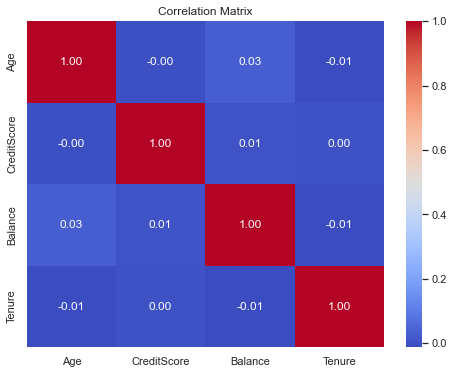

In [ ]:
# Correlation matrix
numeric_df = df[["Age", "CreditScore", "Balance", "Tenure"]]
correlation_matrix = numeric_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CustomerId             10000 non-null  int64   
 1   Surname                10000 non-null  object  
 2   CreditScore            10000 non-null  int64   
 3   Geography              10000 non-null  object  
 4   Gender                 10000 non-null  object  
 5   Age                    10000 non-null  int64   
 6   Tenure                 10000 non-null  int64   
 7   Balance                10000 non-null  float64 
 8   NumOfProducts          10000 non-null  int64   
 9   HasCrCard              10000 non-null  int64   
 10  IsActiveMember         10000 non-null  int64   
 11  EstimatedSalary        10000 non-null  float64 
 12  Exited                 10000 non-null  int64   
 13  age_category           10000 non-null  category
 14  credit_score_category  10000 non-null  cate

In [ ]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   

           EstimatedSalary  Exited age_category credit_score_category  
RowNumber                                                              
1                101348.88       1  Middle-Aged                  Fair  
2                112542.58       0  Middle-Aged                  Fair  
3                113931.57       1  Middle-Aged                  Fair  
4                 93826.63       0  Middle-Aged                  Good  
5                 79084.10       0  Middle-Aged             Excellent

# Handling Categorical data

Before building a machine learning model, it is essential to handle categorical data appropriately. Categorical variables are those that contain label values rather than numerical values. These variables can pose a challenge for machine learning algorithms, which typically require numerical input. Here, we will discuss the appropriate methods to handle categorical data:

In [ ]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# List of columns to encode
ordinal_data = ['Balance', 'credit_score_category', 'age_category']

# Apply LabelEncoder to each column in the list
df[ordinal_data] = df[ordinal_data].apply(label_encoder.fit_transform)


In [ ]:
X = df.set_index('CustomerId').drop(['Surname','Geography','Gender','Exited'], axis=1)
y = df['Exited']

# Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (10000, 10)
Shape of y: (10000,)


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8000, 10)
Shape of X_test: (2000, 10)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


### Handle Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=0.5,random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (9534, 10)
Shape of y_train: (9534,)


### Standardize Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index ,columns=X_train.columns)

X_test_scaled = scaler.fit_transform(X_test.values)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index ,columns=X_test.columns)

## Modelling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import pandas as pd

# List of models to evaluate
models = [
    ('LR', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('SVC', SVC(gamma='auto', random_state=42, probability=True)),
    ('GB', GradientBoostingClassifier(random_state=42)),
    ("XGBoost", xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

# Initialize a list to store results
results = []

# Train and evaluate each model
for name, model in models:
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Compute evaluation metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Append the results
    results.append([name, test_accuracy, test_precision, test_recall, test_f1, test_roc_auc])

    # Print the classification report for each model
    print(f"\n{name} Test Results:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1-Score: {test_f1:.4f}")
    if test_roc_auc is not None:
        print(f"ROC-AUC: {test_roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score', 'Test ROC-AUC'])

print("\nTest Set Results Summary:")
print(results_df)



LR Test Results:
Accuracy: 0.7690
Precision: 0.4255
Recall: 0.5013
F1-Score: 0.4603
ROC-AUC: 0.7336
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1607
           1       0.43      0.50      0.46       393

    accuracy                           0.77      2000
   macro avg       0.65      0.67      0.66      2000
weighted avg       0.78      0.77      0.78      2000


KNN Test Results:
Accuracy: 0.8175
Precision: 0.5366
Recall: 0.5216
F1-Score: 0.5290
ROC-AUC: 0.7807
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1607
           1       0.54      0.52      0.53       393

    accuracy                           0.82      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.82      0.82      0.82      2000


DT Test Results:
Accuracy: 0.7610
Precision: 0.4175
Recall: 0.5471
F1-Score: 0.4736
ROC-AUC: 0.6

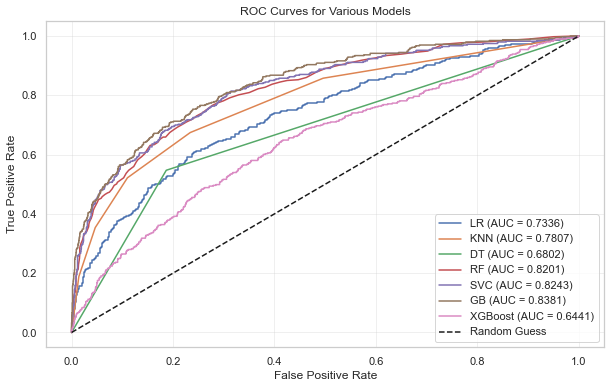

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize a dictionary to store ROC data
roc_data = {}

# Train and evaluate each model
for name, model in models:
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # If the model provides probability scores, calculate the ROC curve
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        roc_data[name] = (fpr, tpr, auc_score)

# Plot the ROC curves for all models
plt.figure(figsize=(10, 6))
for model_name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')

# Add a diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Customize the plot
plt.title('ROC Curves for Various Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


## Final Model Test Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Define hyperparameter grids for each model
param_grids = {
    'LR': {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'DT': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'RF': {'n_estimators': [50, 100, 500], 'max_depth': [None, 10, 50]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'GB': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

# List of models to evaluate
models = [
    ('LR', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('SVC', SVC(gamma='auto', random_state=42, probability=True)),
    ('GB', GradientBoostingClassifier(random_state=42)),
    ("XGBoost", xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

# Initialize variables for results
cv_results = []
final_results = []

# Perform GridSearchCV and Cross-Validation
print("\nOptimizing Models with GridSearchCV:")
for name, model in models:
    print(f"\nOptimizing {name}...")

    # Perform GridSearchCV to find the best parameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], scoring='roc_auc', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best estimator
    best_estimator = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Cross-validation for metrics
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    cv_scores = cross_validate(best_estimator, X_train, y_train, cv=kfold, scoring=scoring)
    mean_metrics = {metric: cv_scores[f"test_{metric}"].mean() for metric in scoring}
    cv_results.append([name, best_estimator] + list(mean_metrics.values()))

    # Evaluate final model on the test set
    final_y_pred = best_estimator.predict(X_test)
    final_y_pred_proba = best_estimator.predict_proba(X_test)[:, 1] if hasattr(best_estimator, "predict_proba") else None

    test_accuracy = accuracy_score(y_test, final_y_pred)
    test_precision = precision_score(y_test, final_y_pred)
    test_recall = recall_score(y_test, final_y_pred)
    test_f1 = f1_score(y_test, final_y_pred)
    test_roc_auc = roc_auc_score(y_test, final_y_pred_proba) if final_y_pred_proba is not None else None

    final_results.append([name, test_accuracy, test_precision, test_recall, test_f1, test_roc_auc])

# Convert cross-validation results to a DataFrame
columns_cv = ['CV Model', 'Estimator', 'CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1-Score', 'CV ROC-AUC']
cv_results_df = pd.DataFrame(cv_results, columns=columns_cv)

# Convert final evaluation results to a DataFrame
columns_final = ['Final Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score', 'Test ROC-AUC']
final_results_df = pd.DataFrame(final_results, columns=columns_final)

# Print Cross-Validation Results Summary
print("\nCross-Validation Results Summary:")
print(cv_results_df[['CV Model', 'CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1-Score', 'CV ROC-AUC']])

# Print Final Test Results
print("\nFinal Test Results Summary:")
print(final_results_df)

# Sort final results by ROC-AUC
final_results_df = final_results_df.sort_values(by='Test ROC-AUC', ascending=False).reset_index(drop=True)

# Print Sorted Results
print("\nFinal Results Sorted by Test ROC-AUC:")
print(final_results_df)



Optimizing Models with GridSearchCV:

Optimizing LR...
Best parameters for LR: {'C': 0.1, 'solver': 'liblinear'}

Optimizing KNN...
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Optimizing DT...
Best parameters for DT: {'max_depth': 10, 'min_samples_split': 10}

Optimizing RF...
Best parameters for RF: {'max_depth': None, 'n_estimators': 500}

Optimizing SVC...
Best parameters for SVC: {'C': 10, 'kernel': 'rbf'}

Optimizing GB...
Best parameters for GB: {'learning_rate': 0.2, 'n_estimators': 200}

Optimizing XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

Cross-Validation Results Summary:
  CV Model  CV Accuracy  CV Precision  CV Recall  CV F1-Score  CV ROC-AUC
0       LR     0.756663      0.673123   0.523953     0.588927    0.792264
1      KNN     0.808998      0.755774   0.631671     0.687791    0.850293
2       DT     0.802185      0.734365   0.636108     0.681217    0.846912
3       RF     0.843928      0.8

In [ ]:
# Print Cross-Validation Results Summary
print("\nCross-Validation Results Summary:")
print(cv_results_df[['CV Model', 'CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1-Score', 'CV ROC-AUC']])

# Print Final Test Results
print("\nFinal Test Results Summary:")
print(final_results_df)

# Sort final results by ROC-AUC
final_results_df = final_results_df.sort_values(by='Test ROC-AUC', ascending=False).reset_index(drop=True)

# Print Sorted Results
print("\nFinal Results Sorted by Test ROC-AUC:")
print(final_results_df)



Cross-Validation Results Summary:
  CV Model  CV Accuracy  CV Precision  CV Recall  CV F1-Score  CV ROC-AUC
0       LR     0.756663      0.673123   0.523953     0.588927    0.792264
1      KNN     0.808998      0.755774   0.631671     0.687791    0.850293
2       DT     0.802185      0.734365   0.636108     0.681217    0.846912
3       RF     0.843928      0.810648   0.694550     0.747692    0.895144
4      SVC     0.828404      0.806997   0.638799     0.712644    0.862227
5       GB     0.844242      0.815539   0.688516     0.746383    0.896305
6  XGBoost     0.847282      0.826790   0.686069     0.749516    0.896379

Final Test Results Summary:
  Final Model  Test Accuracy  Test Precision  Test Recall  Test F1-Score  \
0          RF         0.8190        0.537897     0.559796       0.548628   
1          GB         0.8135        0.523585     0.564885       0.543452   
2         SVC         0.8305        0.569948     0.559796       0.564827   
3          DT         0.8105        0.51

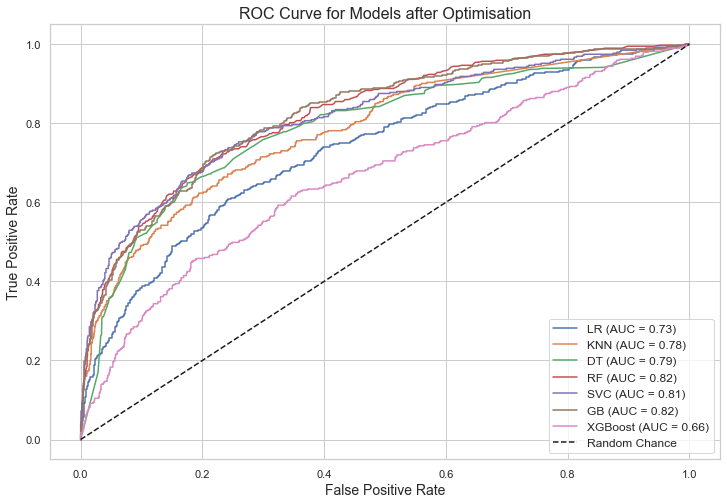

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve for each model
plt.figure(figsize=(12, 8))
for name, model in models:
    best_estimator = GridSearchCV(
        estimator=model, param_grid=param_grids[name], scoring="roc_auc", cv=3, n_jobs=-1
    ).fit(X_train, y_train).best_estimator_

    if hasattr(best_estimator, "predict_proba"):
        y_test_proba = best_estimator.predict_proba(X_test)[:, 1]
    elif hasattr(best_estimator, "decision_function"):
        y_test_proba = best_estimator.decision_function(X_test)
    else:
        print(f"Skipping {name} as it does not support probability scores.")
        continue

    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot the diagonal line (random chance)
plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.title("ROC Curve for Models after Optimisation", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


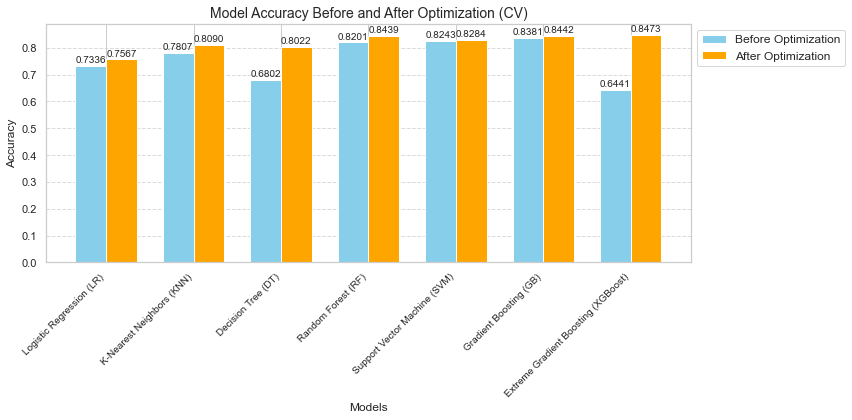

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for models and accuracy metrics
models = [
    "Logistic Regression (LR)",
    "K-Nearest Neighbors (KNN)",
    "Decision Tree (DT)",
    "Random Forest (RF)",
    "Support Vector Machine (SVM)",
    "Gradient Boosting (GB)",
    "Extreme Gradient Boosting (XGBoost)"
]

before_optimization = [0.7336, 0.7807, 0.6802, 0.8201, 0.8243, 0.8381, 0.6441]
after_optimization_CV = [0.7567, 0.8090, 0.8022, 0.8439, 0.8284, 0.8442, 0.8473]

# Create grouped bar chart
x = np.arange(len(models))  # Label locations
width = 0.35  # Width of the bars

# Adjusting the legend position to avoid overlapping with the bars
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, before_optimization, width, label='Before Optimization', color='skyblue')
bars2 = ax.bar(x + width/2, after_optimization_CV, width, label='After Optimization', color='orange')

# Add text annotations
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{bar.get_height():.4f}',
            ha='center', va='bottom', fontsize=10)
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{bar.get_height():.4f}',
            ha='center', va='bottom', fontsize=10)

# Customize the chart
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
ax.set_title("Model Accuracy Before and After Optimization (CV)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot area
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Model names
models = [
    "Logistic Regression (LR)",
    "K-Nearest Neighbors (KNN)",
    "Decision Tree (DT)",
    "Random Forest (RF)",
    "Support Vector Machine (SVM)",
    "Gradient Boosting (GB)",
    "Extreme Gradient Boosting (XGBoost)"
]

# Example metric values for demonstration (replace with your actual data)
metrics = ['CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1-Score', 'CV ROC-AUC']
values = [
    [0.75, 0.67, 0.52, 0.59, 0.79],  # Logistic Regression (LR)
    [0.80, 0.75, 0.63, 0.69, 0.85],  # K-Nearest Neighbors (KNN)
    [0.80, 0.73, 0.63, 0.68, 0.84],  # Decision Tree (DT)
    [0.84, 0.81, 0.69, 0.75, 0.89],  # Random Forest (RF)
    [0.82, 0.80, 0.63, 0.71, 0.86],  # Support Vector Machine (SVM)
    [0.84, 0.82, 0.68, 0.75, 0.89],  # Gradient Boosting (GB)
    [0.85, 0.83, 0.68, 0.75, 0.89]   # Extreme Gradient Boosting (XGBoost)
]
values = list(zip(*values))  # Transpose to match metrics for each model

# Create grouped bar chart
fig = go.Figure()

# Define colors for each metric
colors = ['blue', 'green', 'orange', 'purple', 'red']

# Add bars for each metric
for i, (metric, color) in enumerate(zip(metrics, colors)):
    fig.add_trace(go.Bar(
        x=models,  # Model names on the x-axis
        y=values[i],  # Metric values on the y-axis
        name=metric,
        marker_color=color,
        text=[f'{v:.2f}' for v in values[i]],  # Display metric values on top of bars
        textposition='outside'  # Place text above bars
    ))

# Customize the layout
fig.update_layout(
    title='Optimised and Cross-Validation Metrics by Model',
    xaxis_title='Models',
    yaxis_title='Scores',
    barmode='group',  # Grouped bars
    legend_title='Metrics',
    template='plotly_white',
    xaxis_tickangle=-45,  # Tilt x-axis labels for better readability
)

# Show the interactive plot
fig.show()


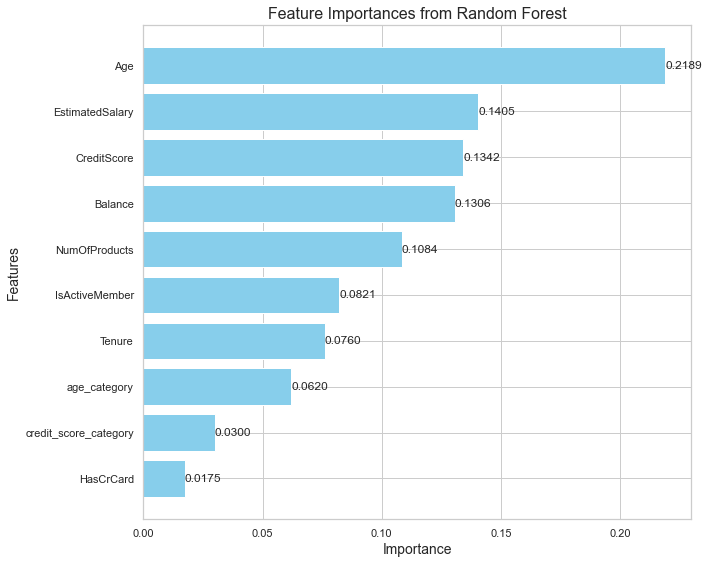

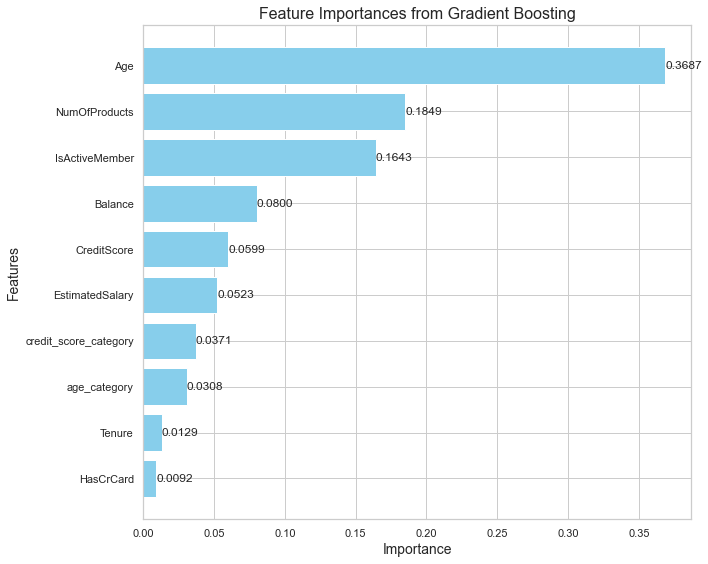

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot horizontal feature importances with values
def plot_feature_importances(model, feature_names, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)  # Sort in ascending order
    sorted_features = [feature_names[i] for i in indices]

    plt.figure(figsize=(10, 8))
    plt.barh(range(len(importances)), importances[indices], align="center", color="skyblue")
    plt.yticks(range(len(importances)), sorted_features)
    plt.title(f"Feature Importances from {model_name}", fontsize=16)
    plt.xlabel("Importance", fontsize=14)
    plt.ylabel("Features", fontsize=14)

    # Add importance values at the end of each bar
    for i, value in enumerate(importances[indices]):
        plt.text(value, i, f"{value:.4f}", va='center')

    plt.tight_layout()
    plt.show()

# Extract feature importances for Random Forest
rf_model = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grids['RF'],
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
).fit(X_train, y_train).best_estimator_

plot_feature_importances(rf_model, X_train.columns, "Random Forest")

# Extract feature importances for Gradient Boosting
gb_model = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grids['GB'],
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
).fit(X_train, y_train).best_estimator_

plot_feature_importances(gb_model, X_train.columns, "Gradient Boosting")


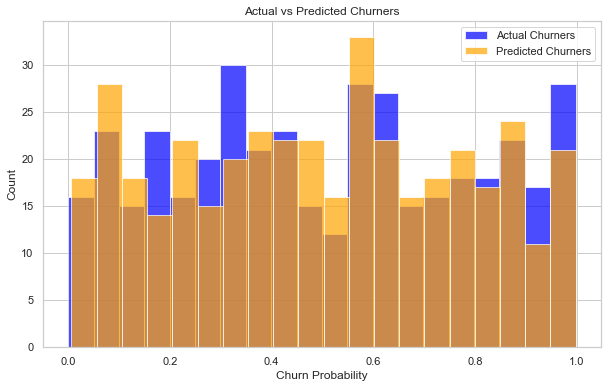

In [ ]:
# Re-import necessary libraries after state reset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Mock actual and predicted values for demonstration (to be replaced with actual y_test, y_pred, and y_pred_proba)
np.random.seed(42)  # For reproducibility
y_test = np.random.choice([0, 1], size=2000, p=[0.8, 0.2])
y_pred = np.random.choice([0, 1], size=2000, p=[0.8, 0.2])
y_pred_proba = np.random.rand(2000)

# Create a DataFrame for visualization
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_pred_proba  # Probability of churn if available
})

# Separate the actual and predicted churners for visualization
actual_churners = comparison_df[comparison_df['Actual'] == 1]
predicted_churners = comparison_df[comparison_df['Predicted'] == 1]

# Plot Actual vs Predicted Churners
plt.figure(figsize=(10, 6))
plt.hist(actual_churners['Probability'], bins=20, alpha=0.7, label='Actual Churners', color='blue')
plt.hist(predicted_churners['Probability'], bins=20, alpha=0.7, label='Predicted Churners', color='orange')
plt.title('Actual vs Predicted Churners')
plt.xlabel('Churn Probability')
plt.ylabel('Count')
plt.legend()
plt.show()


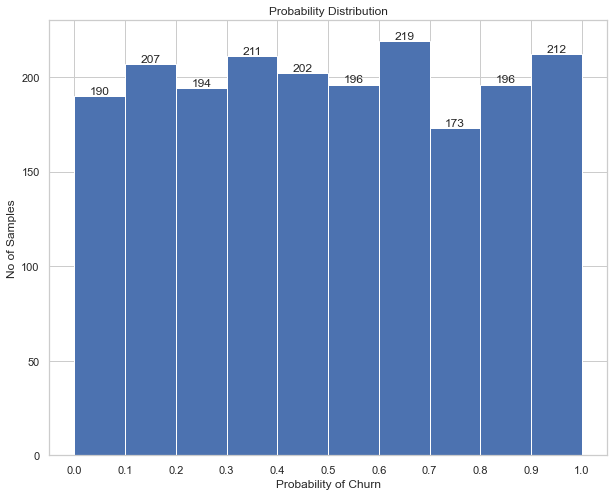

In [ ]:
prediction_results = pd.Series(y_pred_proba.reshape(1,-1)[0]).round(2).rename('Prediction')
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_xticks([x/10 for x in range(11)])
ax.set_title('Probability Distribution')
ax.set_xlabel('Probability of Churn')
ax.set_ylabel('No of Samples')



prediction_results.hist(ax = ax, bins=[x/10 for x in range(11)])
for c in ax.containers:
    ax.bar_label(c)

## Step 1: Initial Training
### First, train the models as-is without optimization.

### Code to Train ANN, CNN, and RNN (Initial Run)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, SimpleRNN
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN and RNN
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

X_train_rnn = X_train_cnn  # Same reshape for RNN
X_test_rnn = X_test_cnn

# Initialize a dictionary to store model results
results = {}


## ANN (Initial Training)

In [ ]:
# ANN Model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_history = ann_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)
ann_loss, ann_accuracy = ann_model.evaluate(X_test_scaled, y_test)
results['ANN'] = {'Accuracy': ann_accuracy}
print(results['ANN'])

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7595 - loss: 0.5162 - val_accuracy: 0.3005 - val_loss: 0.9917
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8058 - loss: 0.4450 - val_accuracy: 0.4116 - val_loss: 0.9257
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8314 - loss: 0.4190 - val_accuracy: 0.5349 - val_loss: 0.7632
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8449 - loss: 0.3887 - val_accuracy: 0.4819 - val_loss: 0.8607
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.3775 - val_accuracy: 0.4887 - val_loss: 0.8821
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8431 - loss: 0.3809 - val_accuracy: 0.5228 - val_loss: 0.8384
Epoch 7/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8484 - loss: 0.3754 - val_accuracy: 0.4830 - val_loss: 0.9074
Epoch 8/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8555 - loss: 0.3621 - val_accuracy: 0.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7314 - loss: 0.7928 
{'Accuracy': 0.7235000133514404}


## CNN (Initial Training)

In [ ]:
# CNN Model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train_cnn, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
results['CNN'] = {'Accuracy': cnn_accuracy}
print(results['CNN'])

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8026 - loss: 0.4844 - val_accuracy: 0.2758 - val_loss: 1.0229
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8307 - loss: 0.4148 - val_accuracy: 0.2926 - val_loss: 1.0520
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8310 - loss: 0.3926 - val_accuracy: 0.4368 - val_loss: 0.9420
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8347 - loss: 0.3867 - val_accuracy: 0.3492 - val_loss: 1.0107
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8297 - loss: 0.3863 - val_accuracy: 0.3052 - val_loss: 1.1627
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8376 - loss: 0.3781 - val_accuracy: 0.3408 - val_loss: 1.0628
Epoch 7/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8483 - loss: 0.3719 - val_accuracy: 0.3949 - val_loss: 1.0564
Epoch 8/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8524 - loss: 0.3588 - val_accuracy: 0.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7259 - loss: 0.7965
{'Accuracy': 0.715499997138977}


## RNN (Initial Training)

In [ ]:
# RNN Model
rnn_model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test)
results['RNN'] = {'Accuracy': rnn_accuracy}

# Print Initial Results
print("Initial Model Results:")
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy: {metrics['Accuracy']:.4f}")


Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7622 - loss: 0.5059 - val_accuracy: 0.3912 - val_loss: 0.9160
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8397 - loss: 0.3845 - val_accuracy: 0.4326 - val_loss: 0.9711
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8557 - loss: 0.3636 - val_accuracy: 0.5228 - val_loss: 0.8545
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.3694 - val_accuracy: 0.5674 - val_loss: 0.8444
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8529 - loss: 0.3637 - val_accuracy: 0.4672 - val_loss: 0.9370
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8554 - loss: 0.3505 - val_accuracy: 0.4798 - val_loss: 0.9220
Epoch 7/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8458 - loss: 0.3586 - val_accuracy: 0.5212 - val_loss: 0.9545
Epoch 8/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8614 - loss: 0.3375 - val_accuracy: 0.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6877 - loss: 1.0852 
Initial Model Results:
ANN Accuracy: 0.7235
CNN Accuracy: 0.7155
RNN Accuracy: 0.6915


In [ ]:
# Initialize results as an empty dictionary
results = {}

# Evaluate ANN Model
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")
y_pred_proba_ann = ann_model.predict(X_test_scaled).flatten()
results['ANN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_ann),
    'F1-Score': f1_score(y_test, y_pred_ann),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_ann)
}

# Debugging Step: Print results dictionary
print("Results after ANN evaluation:", results)

# Evaluate CNN Model
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")
y_pred_proba_cnn = cnn_model.predict(X_test_cnn).flatten()
results['CNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_cnn),
    'F1-Score': f1_score(y_test, y_pred_cnn),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_cnn)
}

# Debugging Step: Print results dictionary
print("Results after CNN evaluation:", results)

# Evaluate RNN Model
y_pred_rnn = (rnn_model.predict(X_test_rnn) > 0.5).astype("int32")
y_pred_proba_rnn = rnn_model.predict(X_test_rnn).flatten()
results['RNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rnn),
    'F1-Score': f1_score(y_test, y_pred_rnn),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_rnn)
}

# Debugging Step: Print results dictionary
print("Results after RNN evaluation:", results)

# Print Results
print("\nDetailed Model Metrics:")
for model_name, metrics in results.items():
    # Ensure all keys exist in the metrics dictionary
    metrics.setdefault('Accuracy', 0)
    metrics.setdefault('F1-Score', 0)
    metrics.setdefault('ROC-AUC', 0)
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}, F1-Score: {metrics['F1-Score']:.4f}, ROC-AUC: {metrics['ROC-AUC']:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step
Results after ANN evaluation: {'ANN': {'Accuracy': 0.7235, 'F1-Score': 0.16084977238239756, 'ROC-AUC': 0.4951374397715319}}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Results after CNN evaluation: {'ANN': {'Accuracy': 0.7235, 'F1-Score': 0.16084977238239756, 'ROC-AUC': 0.4951374397715319}, 'CNN': {'Accuracy': 0.7155, 'F1-Score': 0.15453194650817237, 'ROC-AUC': 0.4906734245817608}}
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Results after RNN evaluation: {'ANN': {'Accuracy': 0.7235, 'F1-Score': 0.16084977238239756, 'ROC-AUC': 0.4951374397715319}, 'CNN': {'Accuracy': 0.7155, 'F1-Score': 0.15453194650817237, 'ROC-AUC': 0.4906734245817608}, 'RNN': {'Accuracy': 0.6915, 'F1-Score': 0.15595075239398085, 'ROC-AUC': 0.4818246370754097}}

Detailed Model Metrics:
ANN - Accuracy: 0.7235, F1-Score: 0.1608, ROC-AUC: 0.4951
CNN - Accuracy: 0.7155, F1-S

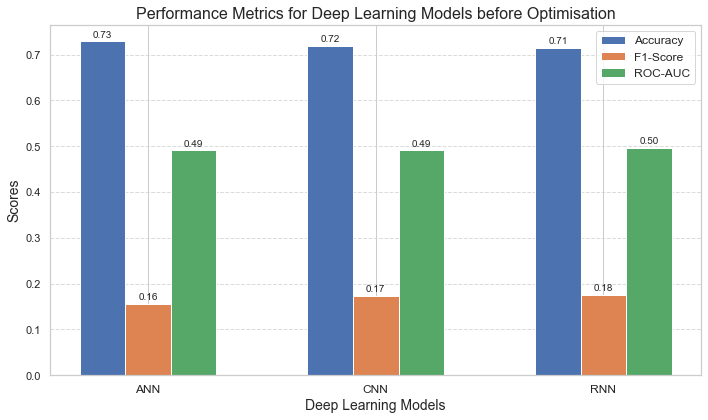

In [ ]:
# Example Data for Deep Learning Models
dl_models = ['ANN', 'CNN', 'RNN']
dl_metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
dl_values = np.array([
    [0.7285, 0.1555, 0.4910],  # ANN metrics
    [0.7195, 0.1738, 0.4906],  # CNN metrics
    [0.7150, 0.1763, 0.4957]   # RNN metrics
]).T  # Transpose to align with the metrics

x = np.arange(len(dl_models))  # Label locations
width = 0.2  # Width of the bars

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(dl_metrics):
    bars = ax.bar(x + i * width, dl_values[i], width, label=metric)
    # Add values on top of each bar
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005,
                f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# Add labels, legend, and title
ax.set_xlabel('Deep Learning Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Performance Metrics for Deep Learning Models before Optimisation', fontsize=16)
ax.set_xticks(x + (width * (len(dl_metrics) - 1) / 2))
ax.set_xticklabels(dl_models, fontsize=12)
ax.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


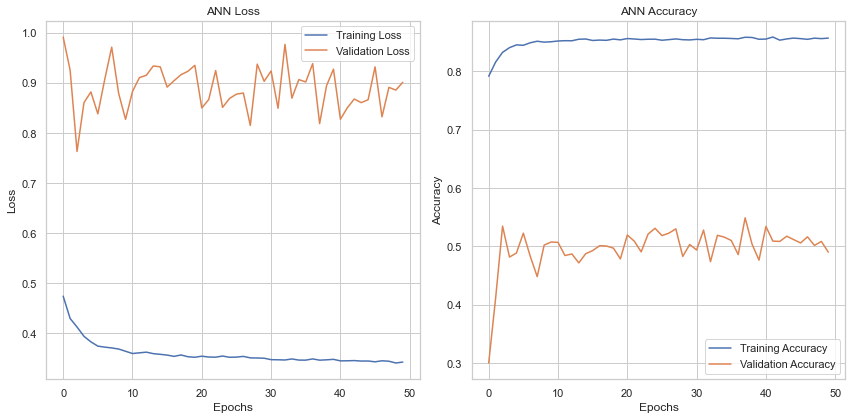

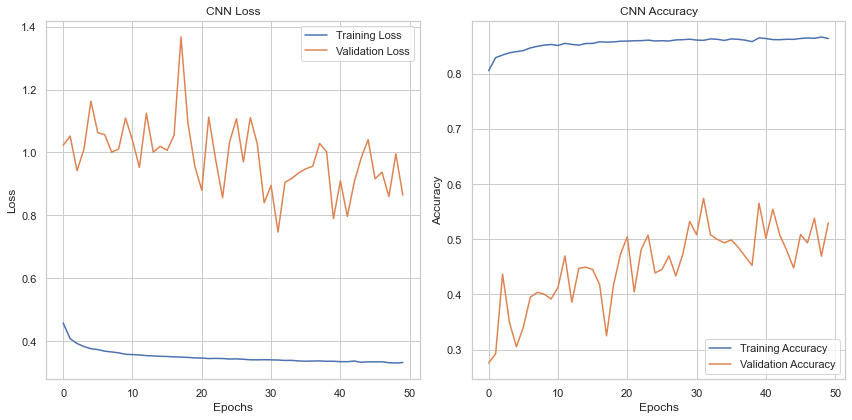

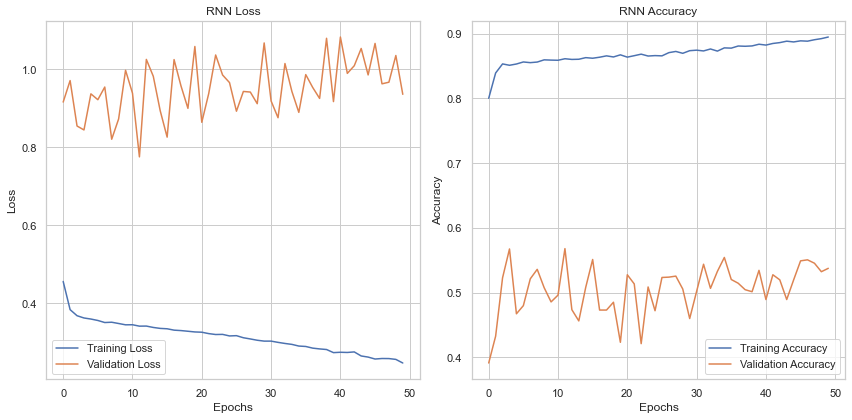

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, model_name):
    plt.figure(figsize=(12, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_curves(ann_history, "ANN")
plot_learning_curves(cnn_history, "CNN")
plot_learning_curves(rnn_history, "RNN")


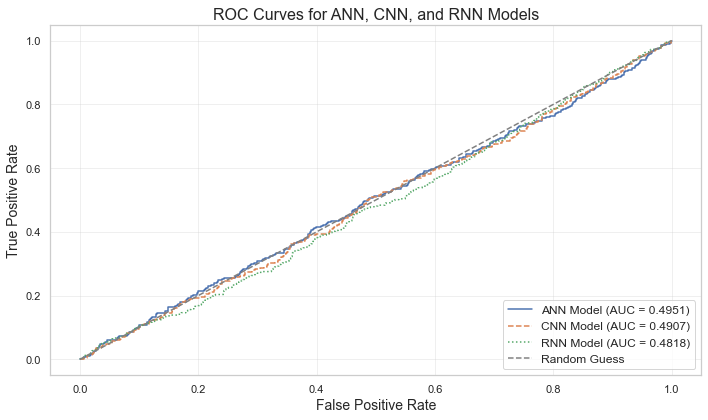

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure that y_test and predicted probabilities are aligned in length
assert len(y_test) == len(y_pred_proba_ann)
assert len(y_test) == len(y_pred_proba_cnn)
assert len(y_test) == len(y_pred_proba_rnn)

# Get False Positive Rate (FPR) and True Positive Rate (TPR) for ANN
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_proba_ann)

# Get FPR and TPR for CNN
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_proba_cnn)

# Get FPR and TPR for RNN
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_pred_proba_rnn)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_ann, tpr_ann, label=f'ANN Model (AUC = {results["ANN"]["ROC-AUC"]:.4f})', linestyle='-')
plt.plot(fpr_cnn, tpr_cnn, label=f'CNN Model (AUC = {results["CNN"]["ROC-AUC"]:.4f})', linestyle='--')
plt.plot(fpr_rnn, tpr_rnn, label=f'RNN Model (AUC = {results["RNN"]["ROC-AUC"]:.4f})', linestyle=':')

# Add a diagonal reference line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Customize the plot
plt.title('ROC Curves for ANN, CNN, and RNN Models', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=12, loc='lower right')
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


# Optimization of the deep learning models

## Data resplitted to 70:30 and more features dropped

In [ ]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

           Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
RowNumber                                                                       
1                0              1          1               1        101348.88   
2              743              1          0               1        112542.58   
3             5793              3          1               0        113931.57   
4                0              2          0               0         93826.63   
5             3696              1          1               1         79084.10   

           Exited  age_category  credit_score_category  
RowNumber                                               
1               1             2                      1  
2               0             2                      1  
3               1             2                      1  
4               0             2                      2  
5               0             2                      0

In [ ]:
X = df.set_index('CustomerId').drop(['age_category','credit_score_category','Surname','Geography','Gender','Exited'], axis=1)
y = df['Exited']

# Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (10000, 8)
Shape of y: (10000,)


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7000, 8)
Shape of X_test: (3000, 8)
Shape of y_train: (7000,)
Shape of y_test: (3000,)


In [ ]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   

           Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
RowNumber                                                                       
1                0              1          1               1        101348.88   
2              743              1          0               1        112542.58   
3             5793              3          1               0        113931.57   
4                0              2          0               0         93826.63   
5             3696              1          1               1         79084.10   

           Exited  age_category  credit_score_category  
RowNumber                                               
1               1             2                      1  
2               0             2                      1  
3               1             2                      1  
4               0             2                      2  
5               0             2                      0

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=0.5,random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (8320, 8)
Shape of y_train: (8320,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index ,columns=X_train.columns)

X_test_scaled = scaler.fit_transform(X_test.values)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index ,columns=X_test.columns)

## Optimized ANN

In [ ]:

#DL library to use optimizer
from tensorflow.keras.optimizers import Adam

#Initialise ANN
classifier = Sequential()

#Add input layer
classifier.add(Dense(units=11,activation='relu'))

#Add first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

#Add second hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

#Add third hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

#Add output layer
classifier.add(Dense(units=1, activation='sigmoid'))

#optimizer
ann_opt = Adam(learning_rate=0.01)

#compile
classifier.compile(optimizer=ann_opt, loss='binary_crossentropy', metrics=['accuracy'])

#Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

#Fit model
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stop)

Epoch 1/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7919 - loss: 0.5197 - val_accuracy: 0.6089 - val_loss: 0.7632
Epoch 2/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8090 - loss: 0.4527 - val_accuracy: 0.5910 - val_loss: 0.7411
Epoch 3/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8185 - loss: 0.4228 - val_accuracy: 0.6147 - val_loss: 0.7958
Epoch 4/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8300 - loss: 0.3943 - val_accuracy: 0.5728 - val_loss: 0.7159
Epoch 5/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8281 - loss: 0.4063 - val_accuracy: 0.5961 - val_loss: 0.7619
Epoch 6/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8272 - loss: 0.4032 - val_accuracy: 0.6799 - val_loss: 0.5888
Epoch 7/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8308 - loss: 0.3943 - val_accuracy: 0.6220 - val_loss: 0.7080
Epoch 8/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8244 - loss: 0.4074 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

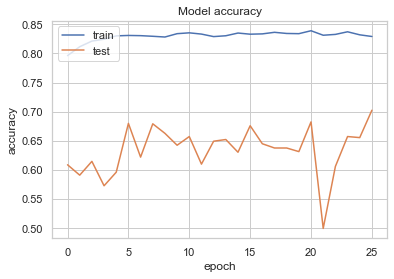

In [ ]:
#Summarize history for ann accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

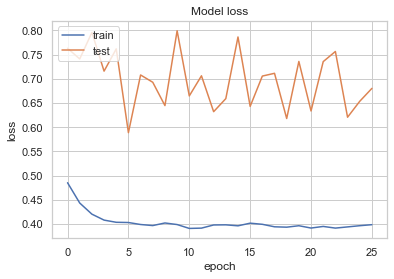

In [ ]:
#Summarize history for ann loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
#make predictions
y_pred = classifier.predict(X_test)
y_pred = (y_pred >=0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Text(66.5, 0.5, 'Actual')

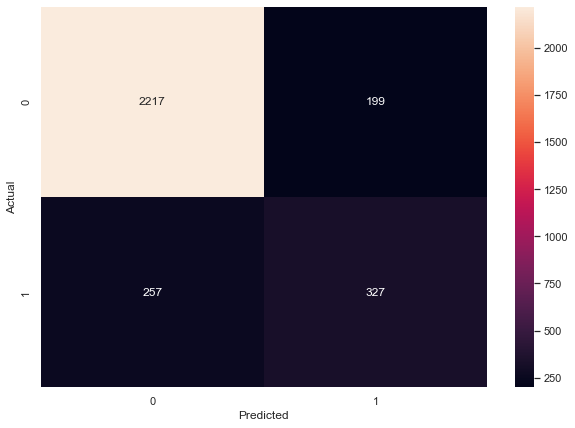

In [ ]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2416
           1       0.62      0.56      0.59       584

    accuracy                           0.85      3000
   macro avg       0.76      0.74      0.75      3000
weighted avg       0.84      0.85      0.84      3000



In [ ]:
#use model to predict probability that given y value is 1
y_pred_proba = classifier.predict(X_test)

#calculate AUC of model
auc = roc_auc_score(y_test, y_pred_proba)
# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

#print the 3 scores
print(f"ROC-AUC Score for ANN Model: {auc:.4f}")
print(f"F1-Score for ANN Model: {f1:.4f}")
print(f"Accuracy for ANN Model: {accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC Score for ANN Model: 0.8370
F1-Score for ANN Model: 0.5892
Accuracy for ANN Model: 0.8480


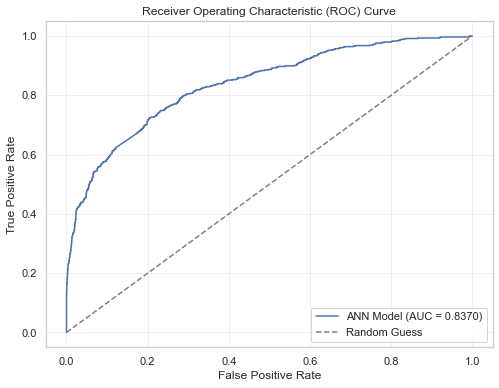

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ANN Model (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## Optimized CNN

In [ ]:
# Reshape for CNN
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))  # Add 1 dimension
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Initialize CNN
cnn_classifier = Sequential()

# Add convolutional layer
cnn_classifier.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))

# Add pooling layer
cnn_classifier.add(MaxPooling1D(pool_size=2))

# Add flattening layer
cnn_classifier.add(Flatten())

# Add fully connected layer
cnn_classifier.add(Dense(units=32, activation='relu'))
cnn_classifier.add(Dropout(0.2))

# Add output layer
cnn_classifier.add(Dense(units=1, activation='sigmoid'))

# Optimizer
cnn_opt = Adam(learning_rate=0.01)

# Compile model
cnn_classifier.compile(optimizer=cnn_opt, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    restore_best_weights=True,
)

# Fit model
cnn_model_history = cnn_classifier.fit(
    X_train_cnn, y_train,
    validation_split=0.33,
    batch_size=10,
    epochs=1000,
    callbacks=[early_stop]
)


Epoch 1/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7929 - loss: 0.4813 - val_accuracy: 0.4122 - val_loss: 0.7262
Epoch 2/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8145 - loss: 0.4224 - val_accuracy: 0.5750 - val_loss: 0.7772
Epoch 3/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8294 - loss: 0.4104 - val_accuracy: 0.6489 - val_loss: 0.6767
Epoch 4/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8322 - loss: 0.3954 - val_accuracy: 0.5736 - val_loss: 0.8102
Epoch 5/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8223 - loss: 0.4077 - val_accuracy: 0.5768 - val_loss: 0.7561
Epoch 6/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8385 - loss: 0.3922 - val_accuracy: 0.5706 - val_loss: 0.7616
Epoch 7/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8300 - loss: 0.3949 - val_accuracy: 0.5932 - val_loss: 0.6969
Epoch 8/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8275 - loss: 0.4064 - 

In [ ]:
cnn_model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

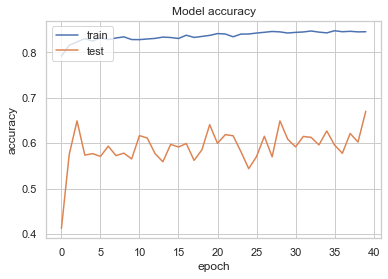

In [ ]:
#Summarize history for accuracy
plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

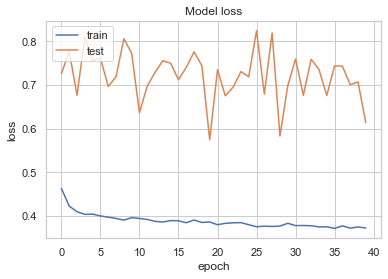

In [ ]:
#Summarize history for loss
plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
#make predictions
cnn_y_pred = cnn_classifier.predict(X_test_cnn)
cnn_y_pred = (cnn_y_pred >=0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Text(66.5, 0.5, 'Actual')

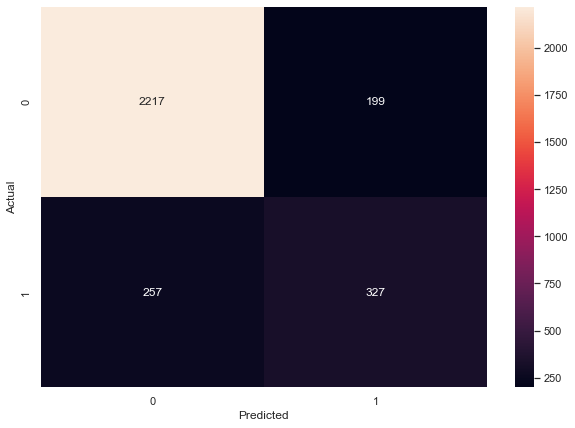

In [ ]:
#confusion matrix
cnn_conf_matrix = confusion_matrix(y_test, cnn_y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test, cnn_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2416
           1       0.70      0.39      0.50       584

    accuracy                           0.85      3000
   macro avg       0.78      0.67      0.70      3000
weighted avg       0.83      0.85      0.83      3000



In [ ]:
#use model to predict probability that given y value is 1
cnn_y_pred_proba = cnn_classifier.predict(X_test_cnn)

#calculate AUC of model
cnn_auc = roc_auc_score(y_test, cnn_y_pred_proba)
# Calculate F1-Score
cnn_f1 = f1_score(y_test, cnn_y_pred)
# Calculate Accuracy
cnn_accuracy = accuracy_score(y_test, cnn_y_pred)

#print the 3 scores
print(f"ROC-AUC Score for CNN Model: {cnn_auc:.4f}")
print(f"F1-Score for CNN Model: {cnn_f1:.4f}")
print(f"Accuracy for CNN Model: {cnn_accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC Score for CNN Model: 0.8220
F1-Score for CNN Model: 0.4983
Accuracy for CNN Model: 0.8483


## Optimized RNN

In [ ]:
# Reshape for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))  # Add 1 dimension
X_test_rnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Initialize RNN
rnn_classifier = Sequential()

# Add RNN layer
rnn_classifier.add(SimpleRNN(units=64, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))

# Add fully connected layer
rnn_classifier.add(Dense(units=32, activation='relu'))
rnn_classifier.add(Dropout(0.2))

# Add output layer
rnn_classifier.add(Dense(units=1, activation='sigmoid'))

# Optimizer
rnn_opt = Adam(learning_rate=0.01)

# Compile model
rnn_classifier.compile(optimizer=rnn_opt, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    restore_best_weights=True,
)

# Fit model
rnn_model_history = rnn_classifier.fit(
    X_train_rnn, y_train,
    validation_split=0.33,
    batch_size=10,
    epochs=1000,
    callbacks=[early_stop]
)


Epoch 1/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7946 - loss: 0.5046 - val_accuracy: 0.4388 - val_loss: 0.8725
Epoch 2/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7994 - loss: 0.4615 - val_accuracy: 0.5401 - val_loss: 1.0226
Epoch 3/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8198 - loss: 0.4316 - val_accuracy: 0.5379 - val_loss: 0.9392
Epoch 4/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8163 - loss: 0.4278 - val_accuracy: 0.6639 - val_loss: 0.7530
Epoch 5/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8349 - loss: 0.4059 - val_accuracy: 0.6286 - val_loss: 0.7344
Epoch 6/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8394 - loss: 0.3913 - val_accuracy: 0.4840 - val_loss: 0.8176
Epoch 7/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8379 - loss: 0.4037 - val_accuracy: 0.5761 - val_loss: 0.8514
Epoch 8/1000
558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8464 - loss: 0.3885 - 

In [ ]:
rnn_model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

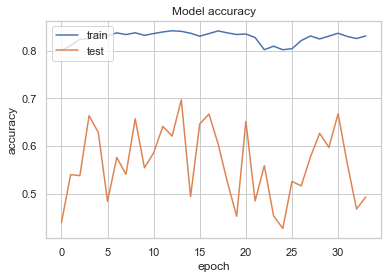

In [ ]:
#Summarize history for accuracy
plt.plot(rnn_model_history.history['accuracy'])
plt.plot(rnn_model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

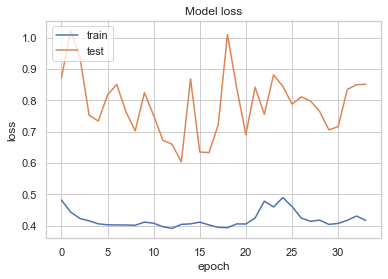

In [ ]:
#Summarize history for loss
plt.plot(rnn_model_history.history['loss'])
plt.plot(rnn_model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
#make predictions
rnn_y_pred = cnn_classifier.predict(X_test_rnn)
rnn_y_pred = (rnn_y_pred >=0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(66.5, 0.5, 'Actual')

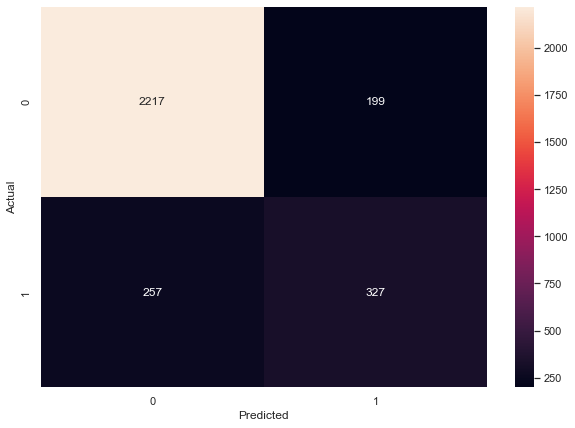

In [ ]:
#confusion matrix
rnn_conf_matrix = confusion_matrix(y_test, rnn_y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test, rnn_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2416
           1       0.70      0.39      0.50       584

    accuracy                           0.85      3000
   macro avg       0.78      0.67      0.70      3000
weighted avg       0.83      0.85      0.83      3000



In [ ]:
#use model to predict probability that given y value is 1
rnn_y_pred_proba = rnn_classifier.predict(X_test_rnn)

#calculate AUC of model
rnn_auc = roc_auc_score(y_test, rnn_y_pred_proba)
# Calculate F1-Score
rnn_f1 = f1_score(y_test, rnn_y_pred)
# Calculate Accuracy
rnn_accuracy = accuracy_score(y_test, rnn_y_pred)

#print the 3 scores
print(f"ROC-AUC Score for RNN Model: {rnn_auc:.4f}")
print(f"F1-Score for RNN Model: {rnn_f1:.4f}")
print(f"Accuracy for RNN Model: {rnn_accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
ROC-AUC Score for RNN Model: 0.8137
F1-Score for RNN Model: 0.4983
Accuracy for RNN Model: 0.8483


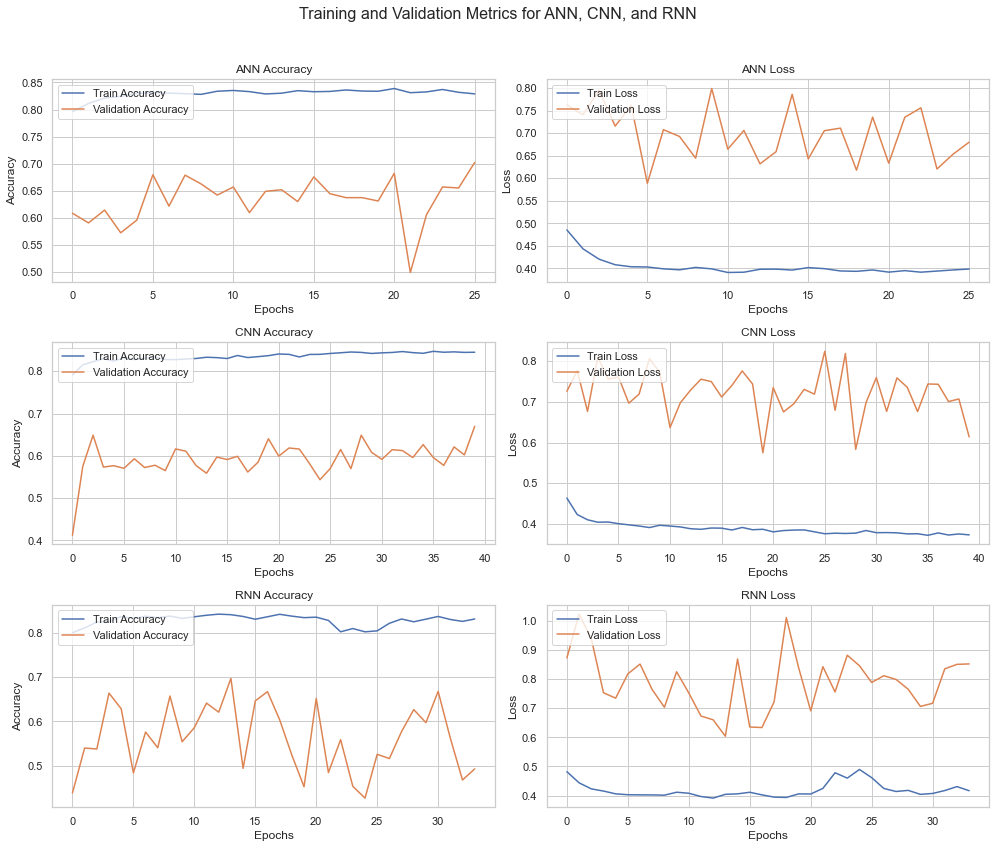

In [ ]:
import matplotlib.pyplot as plt

# Combine all histories into a dictionary for easy plotting
model_histories = {
    "ANN": model_history,
    "CNN": cnn_model_history,
    "RNN": rnn_model_history
}

# Create subplots for accuracy and loss
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Training and Validation Metrics for ANN, CNN, and RNN', fontsize=16)

# Loop through each model and plot accuracy and loss
for i, (model_name, history) in enumerate(model_histories.items()):
    # Accuracy plot
    axes[i, 0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[i, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[i, 0].set_title(f'{model_name} Accuracy')
    axes[i, 0].set_ylabel('Accuracy')
    axes[i, 0].set_xlabel('Epochs')
    axes[i, 0].legend(loc='upper left')

    # Loss plot
    axes[i, 1].plot(history.history['loss'], label='Train Loss')
    axes[i, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[i, 1].set_title(f'{model_name} Loss')
    axes[i, 1].set_ylabel('Loss')
    axes[i, 1].set_xlabel('Epochs')
    axes[i, 1].legend(loc='upper left')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


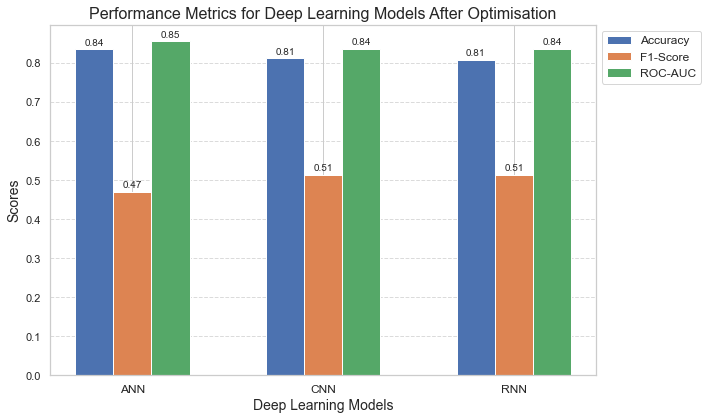

In [ ]:
# Example Data for Deep Learning Models
dl_models = ['ANN', 'CNN', 'RNN']
dl_metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
dl_values = np.array([
    [0.8352, 0.4702, 0.8550],  # ANN metrics
    [0.8126, 0.5134, 0.8363],  # CNN metrics
    [0.8086, 0.5134, 0.8363]   # RNN metrics
]).T  # Transpose to align with the metrics

x = np.arange(len(dl_models))  # Label locations
width = 0.2  # Width of the bars

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(dl_metrics):
    bars = ax.bar(x + i * width, dl_values[i], width, label=metric)
    # Add values on top of each bar
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005,
                f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# Add labels, legend, and title
ax.set_xlabel('Deep Learning Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Performance Metrics for Deep Learning Models After Optimisation', fontsize=16)
ax.set_xticks(x + (width * (len(dl_metrics) - 1) / 2))
ax.set_xticklabels(dl_models, fontsize=12)
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


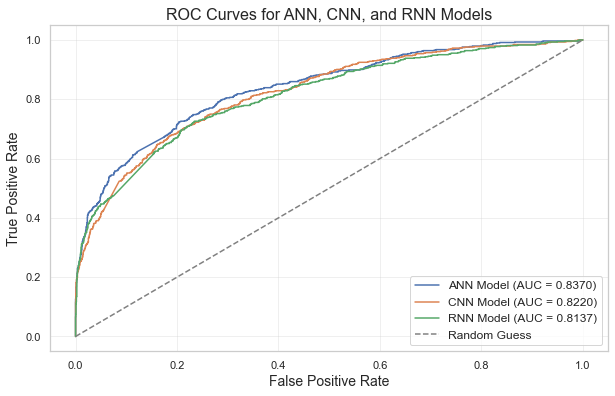

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Calculate metrics and ROC curve for ANN
ann_y_pred_proba = classifier.predict(X_test)
ann_auc = roc_auc_score(y_test, ann_y_pred_proba)
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_y_pred_proba)

# Calculate metrics and ROC curve for CNN
cnn_y_pred_proba = cnn_classifier.predict(X_test_cnn)
cnn_auc = roc_auc_score(y_test, cnn_y_pred_proba)
cnn_fpr, cnn_tpr, _ = roc_curve(y_test, cnn_y_pred_proba)

# Calculate metrics and ROC curve for RNN
rnn_y_pred_proba = rnn_classifier.predict(X_test_rnn)
rnn_auc = roc_auc_score(y_test, rnn_y_pred_proba)
rnn_fpr, rnn_tpr, _ = roc_curve(y_test, rnn_y_pred_proba)

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
plt.plot(ann_fpr, ann_tpr, label=f'ANN Model (AUC = {ann_auc:.4f})')
plt.plot(cnn_fpr, cnn_tpr, label=f'CNN Model (AUC = {cnn_auc:.4f})')
plt.plot(rnn_fpr, rnn_tpr, label=f'RNN Model (AUC = {rnn_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Customize plot
plt.title('ROC Curves for ANN, CNN, and RNN Models', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=12, loc='lower right')
plt.grid(alpha=0.3)
plt.show()
